In [65]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter
from num2words import num2words

import regex as re
import nltk
import os
import string
import numpy as np
import copy
import pandas as pd
import pickle
import re
import math

In [3]:
telegraph = pd.read_csv("C:/Users/jw156/Ironhack/vaccine/vaccine_sentiment/english/telegraph.csv", index_col=0)
guardian = pd.read_csv("C:/Users/jw156/Ironhack/vaccine/vaccine_sentiment/english/guardian.csv", index_col=0)
independent = pd.read_csv("C:/Users/jw156/Ironhack/vaccine/vaccine_sentiment/english/independent.csv", index_col=0)

In [26]:
telegraph = telegraph.rename(columns={'times': 'date', 'hrefs': 'href'})

In [19]:
telegraph

,title,hrefs,date
0,\nCoronavirus latest news: Joint EU-UK stateme...,https://www.telegraph.co.uk/global-health/scie...,"24 Mar 2021, 7:00pm"
1,\nEurope tightens Covid restrictions as 'third...,https://www.telegraph.co.uk/politics/2021/03/2...,"24 Mar 2021, 4:30pm"
2,\nPubs may demand Covid passport before they w...,https://www.telegraph.co.uk/politics/2021/03/2...,"24 Mar 2021, 6:36pm"
3,\nBoris Johnson warns EU that vaccine ban targ...,https://www.telegraph.co.uk/news/2021/03/24/eu...,"24 Mar 2021, 7:26pm"
4,\nLateral flow Covid testing too inaccurate to...,https://www.telegraph.co.uk/news/2021/03/24/la...,"24 Mar 2021, 6:34pm"
...,...,...,...
22390,\nChina's coronavirus outbreak proves we must ...,https://www.telegraph.co.uk/global-health/scie...,"24 Jan 2020, 2:33pm"
22391,\nCoronavirus tests come back negative on 14 p...,https://www.telegraph.co.uk/news/2020/01/24/co...,"24 Jan 2020, 1:37pm"
22392,\nThe best of The Telegraph in audio: The batt...,https://www.telegraph.co.uk/news/2020/01/24/be...,"24 Jan 2020, 12:04pm"
22393,"\nCoronavirus: China hastily builds new 1,000-...",https://www.telegraph.co.uk/news/2020/01/24/wa...,"24 Jan 2020, 10:59am"


In [12]:
guardian = guardian.rename(columns={'web_title': 'title', 'web_url': 'href', '_date': 'date'})

In [20]:
guardian

,id,title,href,date
0,education/2021/mar/10/gillian-oxford-obituary,Gillian Oxford obituary,https://www.theguardian.com/education/2021/mar...,2021-03-10T15:51:27Z
1,politics/2021/mar/19/boris-johnson-receives-fi...,Boris Johnson receives Oxford/AstraZeneca Covi...,https://www.theguardian.com/politics/2021/mar/...,2021-03-19T19:23:04Z
2,books/2021/mar/24/campaign-to-buy-jrr-tolkiens...,Campaign to buy JRR Tolkien's Oxford home fails,https://www.theguardian.com/books/2021/mar/24/...,2021-03-24T12:36:38Z
3,world/2021/feb/19/german-politicians-counter-a...,Scepticism over Oxford vaccine threatens Europ...,https://www.theguardian.com/world/2021/feb/19/...,2021-02-19T13:53:59Z
4,world/2021/mar/18/thursday-briefing-eus-expert...,Thursday briefing: EU's experts to give Oxford...,https://www.theguardian.com/world/2021/mar/18/...,2021-03-18T06:31:09Z
...,...,...,...,...
32053,sport/live/2020/apr/28/brazil-v-france-world-c...,France edge Brazil in World Cup 1986 quarter-f...,https://www.theguardian.com/sport/live/2020/ap...,2020-04-28T21:28:15Z
32054,sport/live/2020/jul/11/england-v-west-indies-f...,"England v West Indies: first Test, day four – ...",https://www.theguardian.com/sport/live/2020/ju...,2020-07-11T20:04:35Z
32055,politics/live/2020/mar/09/boris-johnson-cobra-...,Containment of virus 'extremely unlikely to wo...,https://www.theguardian.com/politics/live/2020...,2020-03-09T18:11:14Z
32056,us-news/live/2020/mar/11/joe-biden-bernie-sand...,Trump says US to suspend travel from Europe in...,https://www.theguardian.com/us-news/live/2020/...,2020-03-12T04:29:30Z


In [15]:
independent = independent.rename(columns={'hrefs': 'href'})

In [21]:
independent

,title,href,date
0,Coronavirus: Italy deaths jump by more than ha...,https://www.independent.co.uk/news/health/coro...,2020-03-09
1,£5bn for faster broadband to feature in Budget...,https://www.independent.co.uk/news/uk/politics...,2020-03-09
2,Budget: Rishi Sunak urged to commit extra £33b...,https://www.independent.co.uk/news/uk/politics...,2020-03-09
3,Police shoot man dead in central London after ...,https://www.independent.co.uk/news/uk/crime/lo...,2020-03-09
4,Coronavirus: BA cancels dozens of Italy flight...,https://www.independent.co.uk/travel/news-and-...,2020-03-09
...,...,...,...
107480,"Tornadoes pummel Alabama, killing at least 3",https://www.independent.co.uk/news/tornadoes-p...,2021-03-25
107481,University of Aberdeen to become one of the fi...,https://www.independent.co.uk/news/uk/home-new...,2021-03-25
107482,Biden press conference: President stirs contro...,https://www.independent.co.uk/news/world/ameri...,2021-03-25
107483,‘Stop the Steal’ GOP lawmakers sidestep electi...,https://www.independent.co.uk/news/world/ameri...,2021-03-25


In [148]:
newspapers = pd.concat([telegraph, independent, guardian], join="inner")

## Preprocessing Headlines

In [48]:
def remove_new_line(sentence):
    sentence = sentence.replace('\n','') 
    sentence = re.sub("\xa0", "", sentence)
    return sentence

In [53]:
# def make_sentence(sentence):
#     sent = sentence.split(' ')
#     word = [word.lower() for word in sent]
#     return word

In [56]:
def remove_stop_words(sentence):
    stop_words = stopwords.words('english')
    words = word_tokenize(str(sentence))
    new_text = ""
    for w in words:
        if w not in stop_words and len(w) > 1:
            new_text = new_text + " " + w
    return new_text

In [77]:
def remove_punctuation(sentence):
    sentence = re.sub("[^\w\s]", "", sentence)
    return sentence

In [79]:
def remove_appost(sentence):
    sentence = re.sub("'", "", sentence)
    return sentence

In [82]:
def stemming(sentence):
    stemmer= PorterStemmer()
    
    tokens = word_tokenize(str(sentence))
    new_text = ""
    for w in tokens:
        new_text = new_text + " " + stemmer.stem(w)
    return new_text

In [132]:
def convert_numbers(sentence):
    sentence = ' '.join(re.split('(\d+)',sentence))
    tokens = word_tokenize(str(sentence))
    new_text = ""
    for w in tokens:
        try:
            w = num2words(int(w))
        except:
            a = 0
        new_text = new_text + " " + w
    new_text = re.sub("-", " ", new_text)
    return new_text

In [145]:
def remove_blanks(sentence):
    sentence = sentence.strip()
    return sentence

In [147]:
def preprocess(sentence):
    sentence = remove_new_line(sentence)
    sentence = remove_stop_words(sentence)
    sentence = remove_punctuation(sentence)
    sentence = remove_appost(sentence)
    sentence = stemming(sentence)
    sentence = convert_numbers(sentence)
    sentence = remove_blanks(sentence)
    return sentence

In [149]:
newspapers['new_title'] = newspapers.title.apply(preprocess)

## Preprocessing Hrefs

In [185]:
def get_id(href):
    if "uk/" in href:
        ids = href.split("uk/")[1]
    else:
        ids = href.split("com/")[1]
    ids = ids.split("/")[0]
    if len(ids.split('-')) > 3:
        return 'delete'
    return ids

In [186]:
get_id("https://www.theguardian.com/sport/live")

'sport'

In [187]:
newspapers['id'] = newspapers.href.apply(get_id)

In [189]:
# newspapers['id'].unique()

In [192]:
newspapers = newspapers[newspapers['id'] !='delete']

## Preprocessing Dates

In [177]:
def date_time(date):
    if date != 'no date':
        x = pd.to_datetime(date)
        return str(x)[:10]
    else:
        return 0

In [179]:
newspapers['date'] = newspapers.date.apply(date_time)

## Preproccessing Newspaper Names

In [181]:
def newspaper_name(href):
    if 'independent.co.uk' in href:
        return 'independent'
    elif 'guardian.com' in href:
        return 'guardian'
    else:
        return 'telegraph'

In [182]:
newspapers['title'] = newspapers.href.apply(newspaper_name)

## Save dataframe

In [195]:
newspapers.to_csv('C:/Users/jw156/Ironhack/vaccine/vaccine_sentiment/english/newspaper_df.csv')
print("Sucessfully saved")

Sucessfully saved


# Only Covid-related

## Covid Dicts

In [196]:
guardian = newspapers[newspapers['title'] == 'guardian']
independent = newspapers[newspapers['title'] == 'independent']
telegraph = newspapers[newspapers['title'] == 'telegraph']

In [197]:
tory_words_list = telegraph['new_title'].tolist()

In [198]:
news_dict = {}
for headline in tory_words_list:
    f = headline.split(' ')
    for word in f:
        x = word.lower()
        if x not in news_dict:
            news_dict[x] = 1
        else:
            news_dict[x] += 1

In [199]:
 sort_telegraph = sorted(news_dict.items(), key=lambda x: x[1], reverse=True)

In [200]:
telegraph_words_articles = []
for entry in sort_telegraph:
    if entry[1] >= 100:
        telegraph_words_articles.append(entry[0])
len(telegraph_words_articles)

406

In [201]:
guardian_words_list = guardian['new_title'].tolist()

In [202]:
guardian_news_dic = {}
for headline in guardian_words_list:
    f = headline.split(' ')
    for word in f:
        x = word.lower()
        if x not in guardian_news_dic:
            guardian_news_dic[x] = 1
        else:
            guardian_news_dic[x] += 1

In [203]:
 sort_guardian = sorted(guardian_news_dic.items(), key=lambda x: x[1], reverse=True)

In [204]:
# sort_guardian

In [205]:
guardian_news_words = []
for entry in sort_guardian:
    if entry[1] >= 100:
        guardian_news_words.append(entry[0])
len(guardian_news_words)

543

In [206]:
corona_list= ["corona","ons","hancock","whitty","valance","johnson","coronavirus","virus","lockdown","pandemic","epidemic","pcr-test","vaccination","doctor","trace","icu",'itu', "covid","covid-19","vaccination","jab","vaccinate","biontech","pfizer", "biontech/pfizer","moderna","johnson&johnson", "curevac","astrazeneca","oxford","janssen"]

In [207]:
def corona_related(x):
    x = x.lower()
    temp_list=x.split(' ')
    score=0
    for word in temp_list:
        #print(word)
        if word in corona_list:
            score_corona=1
            #print(score)
            return score_corona
        elif word in list(telegraph_words_articles):
            score+=1
            #print(score)
        else:
            continue
    return score/(len(temp_list))

In [208]:
guardian["corona_score"]=guardian["new_title"].apply(lambda x: corona_related(x))

<ipython-input-208-42f0f4d1386a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  guardian["corona_score"]=guardian["new_title"].apply(lambda x: corona_related(x))


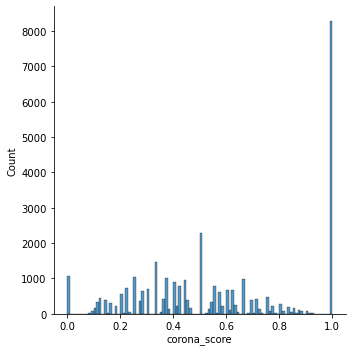

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.displot(guardian["corona_score"],bins=100)
plt.show()

# Independent

In [210]:
independent_words_list = independent['new_title'].tolist()

In [211]:
independent_word_dict = {}
for headline in independent_words_list:
    f = headline.split(' ')
    for word in f:
        x = word.lower()
        if x not in independent_word_dict:
            independent_word_dict[x] = 1
        else:
            independent_word_dict[x] += 1


In [212]:
 sort_independent = sorted(independent_word_dict.items(), key=lambda x: x[1], reverse=True)

In [213]:
 sort_independent

[('coronaviru', 13659),
 ('trump', 8793),
 ('say', 8556),
 ('two', 6649),
 ('new', 6428),
 ('and', 6295),
 ('thousand', 5942),
 ('one', 5451),
 ('the', 5399),
 ('s', 5356),
 ('twenty', 5116),
 ('covid', 4875),
 ('us', 4482),
 ('uk', 4141),
 ('hundred', 3988),
 ('leagu', 3928),
 ('biden', 3696),
 ('lockdown', 3568),
 ('vs', 3546),
 ('live', 3467),
 ('how', 3410),
 ('vaccin', 2789),
 ('best', 2758),
 ('death', 2689),
 ('johnson', 2641),
 ('govern', 2612),
 ('warn', 2526),
 ('premier', 2525),
 ('polic', 2520),
 ('year', 2517),
 ('bori', 2435),
 ('man', 2393),
 ('time', 2393),
 ('peopl', 2390),
 ('could', 2388),
 ('pandem', 2385),
 ('test', 2380),
 ('five', 2373),
 ('call', 2338),
 ('first', 2273),
 ('day', 2244),
 ('fixtur', 2223),
 ('elect', 2193),
 ('news', 2159),
 ('unit', 2126),
 ('claim', 2097),
 ('face', 2086),
 ('nineteen', 2076),
 ('show', 2057),
 ('home', 1961),
 ('get', 1950),
 ('protest', 1896),
 ('amid', 1864),
 ('back', 1845),
 ('three', 1834),
 ('manchest', 1827),
 ('ten', 1

In [214]:
independent_news_words = []
for entry in sort_independent:
    if entry[1] >= 100:
        independent_news_words.append(entry[0])
len(independent_news_words)

1848

In [215]:
corona_list= ["corona","ons","hancock","whitty","valance","johnson","coronavirus","virus","lockdown","pandemic","epidemic","pcr-test","vaccination","doctor","trace","icu",'itu', "covid","covid-19","vaccination","jab","vaccinate","biontech","pfizer", "biontech/pfizer","moderna","johnson&johnson", "curevac","astrazeneca","oxford","janssen"]

In [216]:
def corona_related(x):
    x = x.lower()
    temp_list=x.split(' ')
    score=0
    for word in temp_list:
        #print(word)
        if word in corona_list:
            score_corona=1
            #print(score)
            return score_corona
        elif word in list(telegraph_words_articles):
            score+=1
            #print(score)
        else:
            continue
    return score/(len(temp_list))

In [217]:
independent["corona_score"]=independent["new_title"].apply(lambda x: corona_related(x))

<ipython-input-217-a24a239f1fde>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  independent["corona_score"]=independent["new_title"].apply(lambda x: corona_related(x))


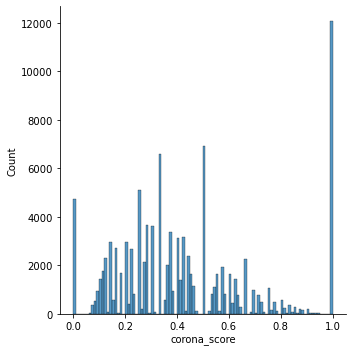

In [218]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.displot(independent["corona_score"],bins=100)
plt.show()

## Create new dataframes

In [219]:
covid_independent = independent[independent['corona_score'] > 0.5].reset_index(drop=True)
covid_independent['hrefs'][68]

KeyError: 'hrefs'

In [72]:
covid_independent['id'].unique()

array(['coronavirus', 'uk', 'us', 'business', 'health', 'science', 'tech',
       'infact'], dtype=object)

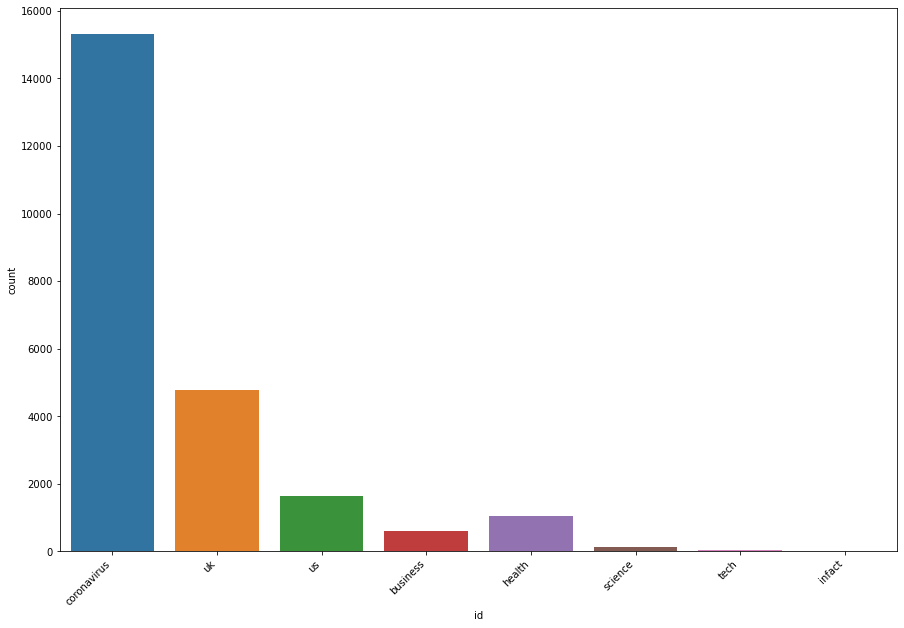

In [73]:
plt.figure(figsize=(15,10))
chart=sns.countplot(x="id", data=covid_independent)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [74]:
covid_guardian = guardian[guardian['corona_score'] > 0.5].reset_index(drop=True)

In [75]:
guardian_drop_list = ['sport', 'football', 'books', 'tv-and-radio', 'music', 'stage', 'media', 'artanddesign', 'film', 'food', 'fashion', 'all-in-all-together', 'membership', 'games', 'theobserber', 'go-make-it', 'animals-farmed', 'gnm-press-office', 'education']

In [76]:
covid_guardian = covid_guardian[~covid_guardian.id.isin(guardian_drop_list)]
counts = covid_guardian['id'].value_counts()
covid_guardian = covid_guardian[~covid_guardian['id'].isin(counts[counts < 9].reset_index(drop=True))]
covid_guardian

,id,web_title,web_url,_date,date,new_title,hrefs,title,newspaper_name,corona_score
1,politics,Boris Johnson receives Oxford/AstraZeneca Covi...,https://www.theguardian.com/politics/2021/mar/...,2021-03-19T19:23:04Z,2021-03-19,bor johnson receiv oxfordastrazenec covid vaccin,https://www.theguardian.com/politics/2021/mar/...,Boris Johnson receives Oxford/AstraZeneca Covi...,guardian,1.000000
3,world,Scepticism over Oxford vaccine threatens Europ...,https://www.theguardian.com/world/2021/feb/19/...,2021-02-19T13:53:59Z,2021-02-19,sceiv oxford vaccin threatens europ immun push,https://www.theguardian.com/world/2021/feb/19/...,Scepticism over Oxford vaccine threatens Europ...,guardian,1.000000
4,world,Thursday briefing: EU's experts to give Oxford...,https://www.theguardian.com/world/2021/mar/18/...,2021-03-18T06:31:09Z,2021-03-18,thursday brief eu expert giv oxford vaccin ver...,https://www.theguardian.com/world/2021/mar/18/...,Thursday briefing: EU's experts to give Oxford...,guardian,1.000000
5,world,Oxford/AstraZeneca vaccine: which countries ha...,https://www.theguardian.com/world/2021/mar/16/...,2021-03-16T17:30:36Z,2021-03-16,oxfordastrazenec vaccin country paus jab,https://www.theguardian.com/world/2021/mar/16/...,Oxford/AstraZeneca vaccine: which countries ha...,guardian,1.000000
6,world,Chaos in Germany and Italy after suspension of...,https://www.theguardian.com/world/2021/mar/16/...,2021-03-16T14:08:31Z,2021-03-16,chao germany ita suspend oxford vaccin,https://www.theguardian.com/world/2021/mar/16/...,Chaos in Germany and Italy after suspension of...,guardian,1.000000
...,...,...,...,...,...,...,...,...,...,...
18731,travel,The end of tourism?,https://www.theguardian.com/travel/2020/jun/18...,2020-06-18T05:00:41Z,2020-06-18,the end tour,https://www.theguardian.com/travel/2020/jun/18...,The end of tourism?,guardian,1.000000
18742,us-news,"Trump to hold first rally in months in Tulsa, ...",https://www.theguardian.com/us-news/live/2020/...,2020-06-11T01:52:09Z,2020-06-11,trump hold first ral month tuls city hist dead...,https://www.theguardian.com/us-news/live/2020/...,"Trump to hold first rally in months in Tulsa, ...",guardian,0.571429
18743,us-news,Trump acknowledges 'new administration' – as i...,https://www.theguardian.com/us-news/live/2021/...,2021-01-08T06:49:33Z,2021-01-08,trump acknowledg new admin hap,https://www.theguardian.com/us-news/live/2021/...,Trump acknowledges 'new administration' – as i...,guardian,0.571429
18745,politics,Containment of virus 'extremely unlikely to wo...,https://www.theguardian.com/politics/live/2020...,2020-03-09T18:11:14Z,2020-03-09,contain vir extrem unlik work say bor johnson ...,https://www.theguardian.com/politics/live/2020...,Containment of virus 'extremely unlikely to wo...,guardian,1.000000


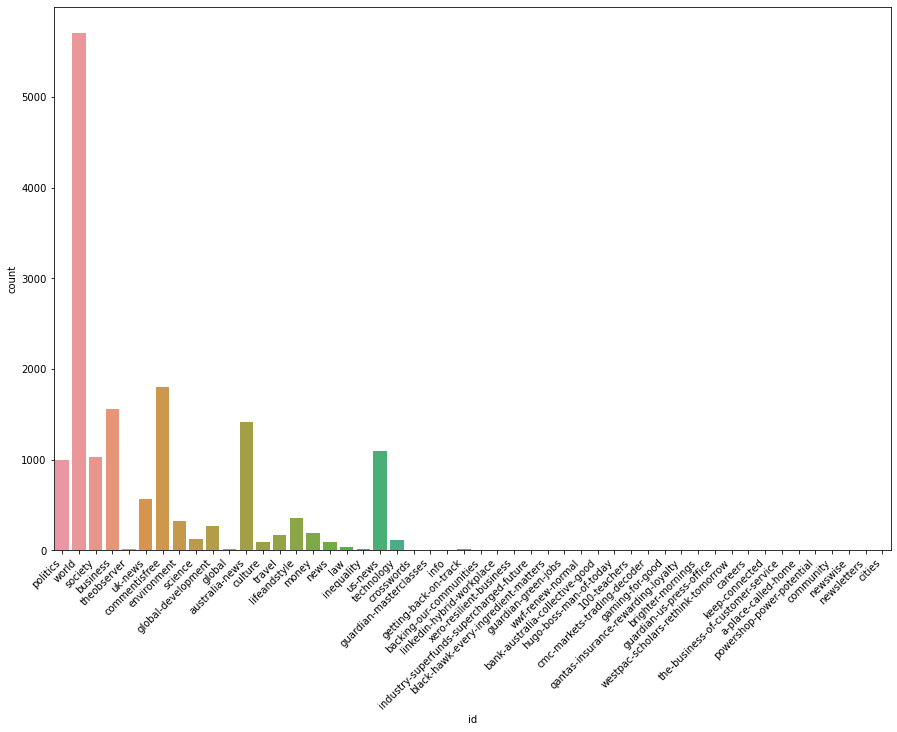

In [77]:
plt.figure(figsize=(15,10))
chart=sns.countplot(x="id", data=covid_guardian)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

## Vaccine

In [78]:
vaccine=["biontech","pfizer", "biontech/pfizer","moderna","johnson&johnson", "curevac","astrazeneca","astra-zeneca","oxford","janssen", 'oxfordastrazeneca']


In [79]:
def vaccine_mentioned(x):
    temp_list=x.split(' ')
    for word in temp_list:
        word = word.lower()
        #print(word)
        if word in vaccine:
            return word
        else:
            return "n/a"  

In [80]:
telegraph["vaccine"]=telegraph["new_title"].apply(lambda x: vaccine_mentioned(x))
telegraph["vaccine"].value_counts()

n/a            22334
oxford            58
astrazeneca        2
moderna            1
Name: vaccine, dtype: int64

In [81]:
covid_guardian["vaccine"]=covid_guardian["new_title"].apply(lambda x: vaccine_mentioned(x))
covid_guardian["vaccine"].value_counts()

n/a         16000
oxford         42
biontech        1
Name: vaccine, dtype: int64

In [82]:
covid_independent['vaccine'] = covid_independent['new_title'].apply(lambda x: vaccine_mentioned(x))
covid_independent['vaccine'].value_counts()

n/a            23562
oxford            20
biontech           3
astrazeneca        1
Name: vaccine, dtype: int64

## Create New DataFrame

In [118]:
newspaper_df = pd.concat([covid_guardian, telegraph, covid_independent], axis=0)


In [119]:
newspaper_df = newspaper_df.drop(['web_title', 'web_url', '_date', 'times', 'corona_score'], axis=1)

In [120]:
cols = ['hrefs', 'title', 'new_title', 'id', 'date', 'newspaper_name', 'vaccine']

In [121]:
newspaper_df = newspaper_df[cols]

In [122]:
newspaper_df

,hrefs,title,new_title,id,date,newspaper_name,vaccine
1,https://www.theguardian.com/politics/2021/mar/...,Boris Johnson receives Oxford/AstraZeneca Covi...,bor johnson receiv oxfordastrazenec covid vaccin,politics,2021-03-19,guardian,n/a
3,https://www.theguardian.com/world/2021/feb/19/...,Scepticism over Oxford vaccine threatens Europ...,sceiv oxford vaccin threatens europ immun push,world,2021-02-19,guardian,n/a
4,https://www.theguardian.com/world/2021/mar/18/...,Thursday briefing: EU's experts to give Oxford...,thursday brief eu expert giv oxford vaccin ver...,world,2021-03-18,guardian,n/a
5,https://www.theguardian.com/world/2021/mar/16/...,Oxford/AstraZeneca vaccine: which countries ha...,oxfordastrazenec vaccin country paus jab,world,2021-03-16,guardian,n/a
6,https://www.theguardian.com/world/2021/mar/16/...,Chaos in Germany and Italy after suspension of...,chao germany ita suspend oxford vaccin,world,2021-03-16,guardian,n/a
...,...,...,...,...,...,...,...
23581,https://www.independent.co.uk/news/uk/politics...,Extreme lockdown laws extended for a further s...,extrem lockdown law extend six month despit ma...,coronavirus,2021-03-25,independent,n/a
23582,https://www.independent.co.uk/news/uk/politics...,Extreme lockdown laws extended for a further s...,extrem lockdown law extend six month despit ma...,coronavirus,2021-03-25,independent,n/a
23583,https://www.independent.co.uk/independentpremi...,The problem with Johnson’s vaccine passports f...,the problem johnson vaccin passport pub,business,2021-03-25,independent,n/a
23584,https://www.independent.co.uk/voices/editorial...,Reality is dawning on the EU: export bans are ...,real dawn eu export ban counterproduc cas covi...,uk,2021-03-25,independent,n/a


In [125]:
def stip_headline(headline):
    x =headline.rstrip()
    return x

In [126]:
newspaper_df['title'] = newspaper_df['title'].apply(stip_headline)

In [127]:
newspaper_df.reset_index(drop=True)

,hrefs,title,new_title,id,date,newspaper_name,vaccine
0,https://www.theguardian.com/politics/2021/mar/...,Boris Johnson receives Oxford/AstraZeneca Covi...,bor johnson receiv oxfordastrazenec covid vaccin,politics,2021-03-19,guardian,n/a
1,https://www.theguardian.com/world/2021/feb/19/...,Scepticism over Oxford vaccine threatens Europ...,sceiv oxford vaccin threatens europ immun push,world,2021-02-19,guardian,n/a
2,https://www.theguardian.com/world/2021/mar/18/...,Thursday briefing: EU's experts to give Oxford...,thursday brief eu expert giv oxford vaccin ver...,world,2021-03-18,guardian,n/a
3,https://www.theguardian.com/world/2021/mar/16/...,Oxford/AstraZeneca vaccine: which countries ha...,oxfordastrazenec vaccin country paus jab,world,2021-03-16,guardian,n/a
4,https://www.theguardian.com/world/2021/mar/16/...,Chaos in Germany and Italy after suspension of...,chao germany ita suspend oxford vaccin,world,2021-03-16,guardian,n/a
...,...,...,...,...,...,...,...
62019,https://www.independent.co.uk/news/uk/politics...,Extreme lockdown laws extended for a further s...,extrem lockdown law extend six month despit ma...,coronavirus,2021-03-25,independent,n/a
62020,https://www.independent.co.uk/news/uk/politics...,Extreme lockdown laws extended for a further s...,extrem lockdown law extend six month despit ma...,coronavirus,2021-03-25,independent,n/a
62021,https://www.independent.co.uk/independentpremi...,The problem with Johnson’s vaccine passports f...,the problem johnson vaccin passport pub,business,2021-03-25,independent,n/a
62022,https://www.independent.co.uk/voices/editorial...,Reality is dawning on the EU: export bans are ...,real dawn eu export ban counterproduc cas covi...,uk,2021-03-25,independent,n/a


In [128]:
newspaper_df.vaccine.value_counts()

n/a            61896
oxford           120
biontech           4
astrazeneca        3
moderna            1
Name: vaccine, dtype: int64

In [129]:
newspaper_df.to_csv('C:/Users/jw156/Ironhack/vaccine/newspapers.csv')
print("Sucessfully saved")

Sucessfully saved


# Dictionary for newspapers

In [90]:
newspaper_words = newspaper_df['new_title'].tolist()

In [91]:
newspaper_words_dict = {}
for headline in newspaper_words:
    f = headline.split(' ')
    for word in f:
        x = word.lower()
        if x not in newspaper_words_dict:
            newspaper_words_dict[x] = 1
        else:
            newspaper_words_dict[x] += 1


In [92]:
 sort_newspaper = sorted(newspaper_words_dict.items(), key=lambda x: x[1], reverse=True)

In [93]:
 sort_newspaper

[('', 70061),
 ('coronavir', 18342),
 ('lockdown', 6822),
 ('uk', 6513),
 ('covid', 6029),
 ('new', 5641),
 ('say', 5271),
 ('us', 4706),
 ('covid19', 4163),
 ('vaccin', 3938),
 ('johnson', 3547),
 ('govern', 3449),
 ('the', 3437),
 ('bor', 3288),
 ('test', 3200),
 ('warn', 3139),
 ('trump', 2928),
 ('could', 2739),
 ('work', 2551),
 ('pandem', 2457),
 ('cas', 2228),
 ('peopl', 2228),
 ('on', 2118),
 ('fac', 2063),
 ('hom', 2024),
 ('two', 1839),
 ('nhs', 1735),
 ('cris', 1723),
 ('off', 1707),
 ('may', 1697),
 ('plan', 1691),
 ('how', 1689),
 ('i', 1661),
 ('england', 1633),
 ('get', 1625),
 ('hap', 1619),
 ('car', 1614),
 ('rul', 1600),
 ('liv', 1594),
 ('pol', 1578),
 ('heal', 1577),
 ('first', 1568),
 ('back', 1506),
 ('tim', 1486),
 ('amid', 1467),
 ('travel', 1429),
 ('help', 1403),
 ('ris', 1401),
 ('nee', 1400),
 ('day', 1394),
 ('hospit', 1377),
 ('thousand', 1367),
 ('report', 1339),
 ('year', 1330),
 ('hundr', 1329),
 ('fear', 1315),
 ('cal', 1274),
 ('econom', 1273),
 ('wee